In [4]:
pip install opencv-python


  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)


In [5]:
import cv2


In [6]:
import matplotlib.pyplot as plt

In [7]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'

In [9]:
model =cv2.dnn_DetectionModel(frozen_model,config_file)

In [11]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [12]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [13]:
print(len(classLabels))

80


In [18]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000000D602096230>

# read on image

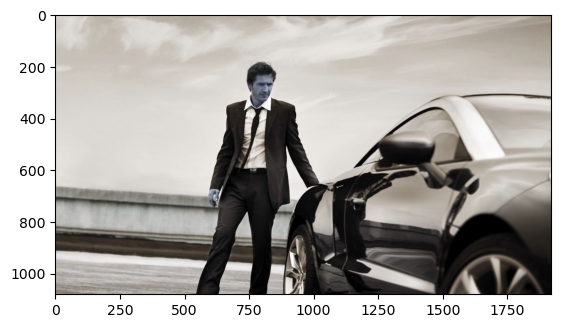

In [24]:
img = cv2.imread('man_tuxedo_car_style_27329_1920x1080.jpg')
plt.imshow(img)

In [25]:
ClassIndex, confidece, bbox= model.detect(img, confThreshold= 0.5)

In [26]:
print(ClassIndex)

[3 1]


In [27]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255, 0, 0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )

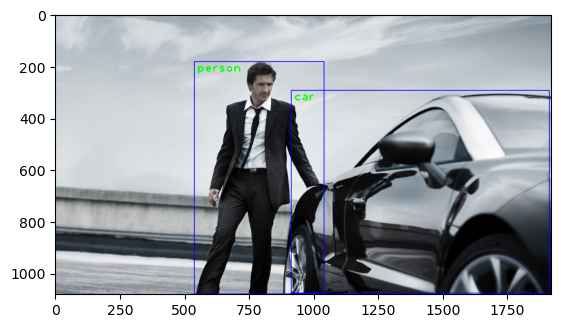

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold= 0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255, 0, 0),2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale= font_scale,color=(0, 255, 0), thickness=3 )
                
    cv2.imshow('Obj detection', frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
            